# Putatively Useful Code from Ely's Test Notebook, Neurohackweek 2017

- Cloned from the demo introductory_3d.ipynb notebook
- Initial functionality based on 
[IPyvolume](https://ipyvolume.readthedocs.io/en/latest/index.html), 
[NiBabel cifti2 package](http://nipy.org/nibabel/reference/nibabel.cifti2.html), and 
[Michiel Cottaar's cifti tools](https://git.fmrib.ox.ac.uk/ndcn0236/cifti)

In [4]:
# load packages etc
%matplotlib inline
import matplotlib.pyplot as plt

import nibabel as nb
import ipyvolume
import ipyvolume.pylab as p3
import numpy as np
import os
import sys

# be sure to set the global variable NHW to your NHW_visualization git directory
# e.g. add 'export NHW=$HOME/Desktop/nhw2017/NHW_visualization' to your ~/.bashrc file
nhw = os.environ['NHW'] # set the global variable NHW to your NHW_visualization git directory


<b>CIFTI Tools:</b>

In [5]:
def cread(file):
    # loads a cifti file and stores the data and metadata
    cin=nb.load(file)
    cdata=np.asarray(cin.get_data()).copy()
    chead=cin.header.copy()
    cnhdr=cin.nifti_header.copy()
    cxtra=cin.extra.copy()
    cfmap=cin.file_map.copy()
    return cdata,chead,cnhdr,cxtra,cfmap

In [6]:
# cread example:
input_cifti=nhw+'/rfMRI_REST1_LR_Atlas_MSMAll_hp2000_clean.dtseries.nii'
cd,ch,cn,cx,cf=cread(input_cifti)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [7]:
def clthresh(data,thresh,setto=0):
    # set all values below threshold to a given value (default 0)
    lthr_data=data.copy()
    lthr_data[lthr_data<thresh]=setto
    return lthr_data

In [8]:
def cuthresh(data,thresh,setto=0):
    # set all values above threshold to a given value (default 0)
    uthr_data=data.copy()
    uthr_data[uthr_data>thresh]=setto
    return uthr_data

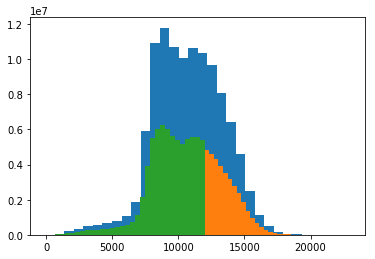

In [10]:
# clthresh/cuthresh example:
tl12000_cd=clthresh(cd,12000)
tu12000_cd=cuthresh(cd,12000)
plt.hist(cd[np.nonzero(cd)], 32);
plt.hist(tl12000_cd[np.nonzero(tl12000_cd)], 32);
plt.hist(tu12000_cd[np.nonzero(tu12000_cd)], 32);

In [12]:
def csave(filename,cdata,chead=None,cnhdr=None,cxtra=None,cfmap=None):
    # saves a cifti data structure to file. Output likely unusable without some header info
    cout=nb.Cifti2Image(dataobj=cdata,header=chead,nifti_header=cnhdr, extra=cxtra, file_map=cfmap)
    cout.to_filename(filename)

In [13]:
# csave example:
output_cifti=nhw+'/save_demo.dtseries.nii'
csave(output_cifti,cd,ch,cn,ch,cf)